In [1]:
from google.colab import files
files.upload()
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d nikhileswarkomati/suicide-watch

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch
License(s): CC-BY-SA-4.0
 99% 60.0M/60.6M [00:03<00:00, 25.4MB/s]
100% 60.6M/60.6M [00:03<00:00, 18.1MB/s]


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('suicide-watch.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [4]:
Suicide = pd.read_csv('Suicide_Detection.csv')
Suicide.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [5]:
Suicide = Suicide.drop('Unnamed: 0',axis=1)
Suicide.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   class   232074 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [6]:
Suicide['text'][10000]

'Why has everything to be so compicated So theres this girl and we vibe so good together its fucking awesome. After the last time we hung i fucking regret to not have just kissed her. Yea she has a bf but she told me im better looking and that He is a pussy (nigga why you still together then???). Now we didnt saw eachother for almost two months and everytime i want to hang she has something to do. Not a good sign ik but then she sends me hearts on snap an says we need to hang again that was a week ago than she left me on opened. After that she responded quickly to a new Message and even wrote me again the next day, now she kinda left me on read but i fucking know that that has nothing to mean cause its Always a Back and forth.Why cant she Just be straight If she dont wanna have contact with me anymore say it ofc it would hurt but i want to know what is going on. We would make a fukin Happy Couple If she Readin this \nI Love you you fucking Idiot.'

In [17]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Initialize WordNetLemmatizer
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove special characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords and apply stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words]

    # Join the words back into a single string
    cleaned_text = ' '.join(words)

    return cleaned_text

# Apply the clean_text function to the 'text' column
Suicide['text'] = Suicide['text'].apply(clean_text)

# Show the cleaned DataFrame
print(Suicide)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                     text        class  Length
0       ex wife threaten suiciderec left wife good che...      suicide     143
1       weird dont get affect compliment come someon k...  non-suicide      27
2       final almost never hear bad year ever swear fu...  non-suicide      26
3                          need helpjust help im cri hard      suicide       9
4       im losthello name adam ive struggl year im afr...      suicide     436
...                                                   ...          ...     ...
232069  dont like rock go get anyth go httpsmusictaste...  non-suicide      19
232070  tell mani friend lone everyth depriv prebought...  non-suicide      31
232071  pee probabl tast like salti tea someon drank p...  non-suicide      14
232072  usual stuff find hereim post sympathi piti kno...      suicide     366
232073  still havent beaten first boss hollow knight i...  non-suicide      33

[232074 rows x 3 columns]


In [18]:
Suicide.head()

,text,class,Length
0,ex wife threaten suiciderec left wife good che...,suicide,143
1,weird dont get affect compliment come someon k...,non-suicide,27
2,final almost never hear bad year ever swear fu...,non-suicide,26
3,need helpjust help im cri hard,suicide,9
4,im losthello name adam ive struggl year im afr...,suicide,436


In [19]:
Suicide['text'][10000]

'everyth compic there girl vibe good togeth fuck awesom last time hung fuck regret kiss yea bf told im better look pussi nigga still togeth didnt saw eachoth almost two month everytim want hang someth good sign ik send heart snap say need hang week ago left open respond quickli new messag even wrote next day kinda left read fuck know noth mean caus alway back forthwhi cant straight dont wan na contact anymor say ofc would hurt want know go would make fukin happi coupl readin love fuck idiot'

In [50]:
# Specify the file path where you want to save the DataFrame
# file_path = 'suicide_detection_cleaned.csv'

# # Save the DataFrame to a CSV file
# Suicide.to_csv(file_path, index=False)

# print("DataFrame saved successfully to:", file_path)

Suicide = pd.read_csv('suicide_detection_cleaned.csv')
Suicide.head()

,text,class,Length
0,ex wife threaten suiciderec left wife good che...,suicide,143
1,weird dont get affect compliment come someon k...,non-suicide,27
2,final almost never hear bad year ever swear fu...,non-suicide,26
3,need helpjust help im cri hard,suicide,9
4,im losthello name adam ive struggl year im afr...,suicide,436


In [51]:
# Suicide['Length'] = Suicide['text'].apply(lambda x: len(x.split(' ')))
# Suicide['Length'].describe()
# Suicide.head()

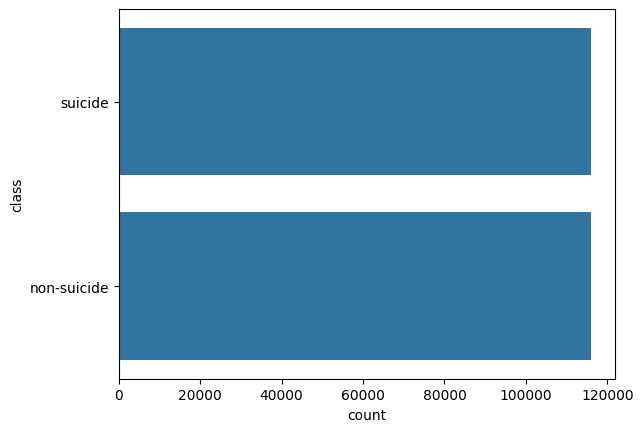

class
suicide        116037
non-suicide    116037
Name: count, dtype: int64


In [52]:
sns.countplot(Suicide['class'])
plt.show()
# Count the number of suicide and non-suicide data points
class_counts = Suicide['class'].value_counts()

# Print the counts
print(class_counts)


In [54]:
Suicide['text'] = Suicide['text'].fillna('').astype(str)
Words = list()
for i in Suicide['text']:
    for j in i.split(' '):
        Words.append(j.upper())
len(Words)

14828663

In [55]:
Words

['EX',
 'WIFE',
 'THREATEN',
 'SUICIDEREC',
 'LEFT',
 'WIFE',
 'GOOD',
 'CHEAT',
 'TWICE',
 'LIE',
 'MUCH',
 'DECID',
 'REFUS',
 'GO',
 'BACK',
 'DAY',
 'AGO',
 'BEGAN',
 'THREATEN',
 'SUICID',
 'TIRELESSLI',
 'SPENT',
 'PAAT',
 'DAY',
 'TALK',
 'KEEP',
 'HESIT',
 'WANT',
 'BELIEV',
 'ILL',
 'COME',
 'BACK',
 'KNOW',
 'LOT',
 'PEOPL',
 'THREATEN',
 'ORDER',
 'GET',
 'WAY',
 'HAPPEN',
 'REALLI',
 'SUPPOS',
 'HANDL',
 'DEATH',
 'HAND',
 'STILL',
 'LOVE',
 'WIFE',
 'DEAL',
 'GET',
 'CHEAT',
 'CONSTANTLI',
 'FEEL',
 'INSECUR',
 'IM',
 'WORRI',
 'TODAY',
 'MAY',
 'DAY',
 'HOPE',
 'MUCH',
 'DOESNT',
 'HAPPEN',
 'WEIRD',
 'DONT',
 'GET',
 'AFFECT',
 'COMPLIMENT',
 'COME',
 'SOMEON',
 'KNOW',
 'IRL',
 'FEEL',
 'REALLI',
 'GOOD',
 'INTERNET',
 'STRANGER',
 'FINAL',
 'ALMOST',
 'NEVER',
 'HEAR',
 'BAD',
 'YEAR',
 'EVER',
 'SWEAR',
 'FUCK',
 'GOD',
 'ANNOY',
 'NEED',
 'HELPJUST',
 'HELP',
 'IM',
 'CRI',
 'HARD',
 'IM',
 'LOSTHELLO',
 'NAME',
 'ADAM',
 'IVE',
 'STRUGGL',
 'YEAR',
 'IM',
 'AFRAID',

In [56]:
from collections import Counter
Words_Freq = Counter(Words)
Words_Freq = pd.DataFrame({'Word':list(Words_Freq.keys()),'Frequency':list(Words_Freq.values())})
Words_Freq.sort_values('Frequency',ascending=False,inplace=True)
Words_Freq.tail(70)

,Word,Frequency
82609,ULTIMAMSH,1
82594,COLLAPSEBEEN,1
82608,VESTIGAG,1
82607,TICKINGI,1
82606,ADVICEWORD,1
...,...,...
82527,ONVHHH,1
82526,LAUGHINGMI,1
82525,KETER,1
82524,USTEALINGYOURSEPTIM,1


In [57]:
len(Words_Freq)

166862

In [58]:
Words_Freq = Words_Freq[Words_Freq['Frequency']>Words_Freq['Frequency'].quantile(0.99)]
len(Words_Freq)

1669

In [59]:
Words_Freq['Frequency'].describe()

count      1669.000000
mean       7826.327741
std       18486.362396
min         914.000000
25%        1446.000000
50%        2659.000000
75%        6387.000000
max      341419.000000
Name: Frequency, dtype: float64

In [60]:
Words_Freq = Words_Freq[Words_Freq['Frequency'] >= 3615.8130000000237]
Words_Freq.head(50)

,Word,Frequency
46,IM,341419
53,DONT,214195
103,LIKE,191698
24,WANT,188456
44,FEEL,171075
32,GET,148413
28,KNOW,143105
12,GO,134780
106,LIFE,120982
79,IVE,110136


In [61]:
Words_Freq.tail()

,Word,Frequency
737,SUBREDDIT,3683
2492,SOMEWHER,3677
2803,ANYBODI,3647
1101,ITLL,3646
2124,PRETEND,3616


In [62]:
Suicide.head()

,text,class,Length
0,ex wife threaten suiciderec left wife good che...,suicide,143
1,weird dont get affect compliment come someon k...,non-suicide,27
2,final almost never hear bad year ever swear fu...,non-suicide,26
3,need helpjust help im cri hard,suicide,9
4,im losthello name adam ive struggl year im afr...,suicide,436


In [65]:
Suicide = Suicide[Suicide.Length<=317]
Suicide.describe()

,Length
count,208955.000000
mean,79.867445
std,74.418093
min,1.000000
25%,24.000000
50%,50.000000
75%,115.000000
max,317.000000


In [66]:
Final_Words = set(Words_Freq.Word)
for i in Final_Words:
    Suicide[i] = Suicide['text'].apply(lambda x: 1 if i in x.upper().split(' ') else 0)
Suicide.drop('text',axis=1,inplace=True)
Suicide.head()
Suicide.to_csv('Suicide.csv', index=False)

<ipython-input-66-dfd0679273b6>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Suicide[i] = Suicide['text'].apply(lambda x: 1 if i in x.upper().split(' ') else 0)
<ipython-input-66-dfd0679273b6>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Suicide[i] = Suicide['text'].apply(lambda x: 1 if i in x.upper().split(' ') else 0)
<ipython-input-66-dfd0679273b6>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all c

In [67]:
Suicide = pd.read_csv('Suicide.csv')
Suicide['LEAST'].value_counts()

LEAST
0    203124
1      5831
Name: count, dtype: int64

In [68]:
Suicide['class'] = Suicide['class'].apply(lambda x: 1 if x == 'suicide' else 0)
Suicide.head()

,class,Length,GO,RELATIONSHIP,PIEC,CHILD,FIGHT,SIMPLI,TRUST,PEOPL,...,FOLLOW,FOOD,QUIT,OUTSID,STRESS,HEAR,UR,RATHER,ANYON,MONTH
0,1,143,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,289,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


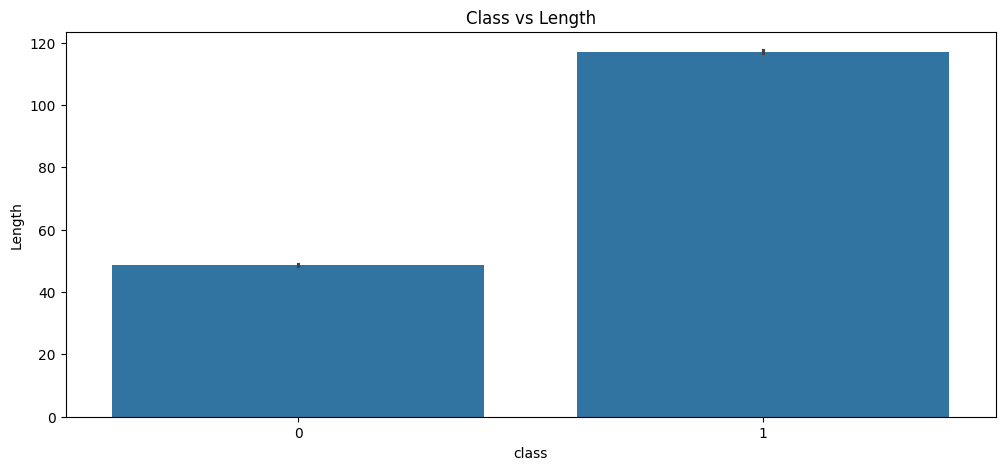

In [69]:
plt.figure(figsize=(12,5))
sns.barplot(x='class',y='Length',data=Suicide)
plt.title('Class vs Length')
plt.show()

In [72]:
Suicide.to_csv('Suicide.csv', index=False)

In [73]:
len(Suicide)

208955

In [75]:
files.download('Suicide.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
from sklearn.model_selection import train_test_split
X = Suicide.drop('class',axis=1)
y = Suicide['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.5,random_state=100)
X_train.head()

,Length,GO,RELATIONSHIP,PIEC,CHILD,FIGHT,SIMPLI,TRUST,PEOPL,FELT,...,FOLLOW,FOOD,QUIT,OUTSID,STRESS,HEAR,UR,RATHER,ANYON,MONTH
199421,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142740,48,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27491,169,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101057,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66960,83,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score

In [78]:
Model = RandomForestClassifier(random_state=100)

# params = {'n_estimators':[200],
#           'max_depth':[3,5,10,12,15,17,20],
#           'max_features':[0.1,0.15,0.2,0.25,0.3],
#           'criterion':['gini','entropy']}

# grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='accuracy')
# grid_search.fit(X_train,y_train)
Model.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [79]:
y_train_pred = Model.predict(X_train)
y_test_pred = Model.predict(X_test)

print('Train accuracy score :',accuracy_score(y_train,y_train_pred))
print('Test accuracy score :',accuracy_score(y_test,y_test_pred))
print('Train recall score :',recall_score(y_train,y_train_pred))
print('Test recall score :',recall_score(y_test,y_test_pred))

Train accuracy score : 0.9990237085674359
Test accuracy score : 0.8870001339995023
Train recall score : 0.998051580733695
Test recall score : 0.8787617867568306


In [102]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Example tweet
tweet = "Why has everything to be sad, depressed so compicated So theres this girl and we vibe so good together its fucking awesome. After the last time we hung i fucking regret to not have just kissed her. Yea she has a bf but she told me im better looking and that He is a pussy (nigga why you still together then???). Now we didnt saw eachother for almost two months and everytime i want to hang she has something to do. Not a good sign ik but then she sends me hearts on snap an says we need to hang again that was a week ago than she left me on opened. After that she responded quickly to a new Message and even wrote me again the next day, now she kinda left me on read but i fucking know that that has nothing to mean cause its Always a Back and forth.Why cant she Just be straight If she dont wanna have contact with me anymore say it ofc it would hurt but i want to know what is going on. We would make a fukin Happy Couple If she Readin this \nI Love you you fucking Idiot."

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Tokenize the tweet
tokens = word_tokenize(tweet)

# Stemize each token
stemmed_tweet = [stemmer.stem(word) for word in tokens]

# Join the stemmed tokens back into a single string
tweet = ' '.join(stemmed_tweet).upper()
print("Stemmed tweet:", tweet)

# Extract column names excluding 'Length' from your DataFrame X
columns = list(X.columns)

# Initialize DataFrame with the same columns as X (excluding 'Length')
df = pd.DataFrame(columns = columns, index=['a'])
for i in columns:
    if i in tweet.upper().split(' '):
        df.loc['a', i]=1
        # df.loc['a', 'Length'] = len(i)
    else:
        df.loc['a', i]=0

df['Length'] = len(tweet)

df


Stemmed tweet: WHI HA EVERYTH TO BE SAD , DEPRESS SO COMPIC SO THERE THI GIRL AND WE VIBE SO GOOD TOGETH IT FUCK AWESOM . AFTER THE LAST TIME WE HUNG I FUCK REGRET TO NOT HAVE JUST KISS HER . YEA SHE HA A BF BUT SHE TOLD ME IM BETTER LOOK AND THAT HE IS A PUSSI ( NIGGA WHI YOU STILL TOGETH THEN ? ? ? ) . NOW WE DIDNT SAW EACHOTH FOR ALMOST TWO MONTH AND EVERYTIM I WANT TO HANG SHE HA SOMETH TO DO . NOT A GOOD SIGN IK BUT THEN SHE SEND ME HEART ON SNAP AN SAY WE NEED TO HANG AGAIN THAT WA A WEEK AGO THAN SHE LEFT ME ON OPEN . AFTER THAT SHE RESPOND QUICKLI TO A NEW MESSAG AND EVEN WROTE ME AGAIN THE NEXT DAY , NOW SHE KINDA LEFT ME ON READ BUT I FUCK KNOW THAT THAT HA NOTH TO MEAN CAUS IT ALWAY A BACK AND FORTH.WHI CANT SHE JUST BE STRAIGHT IF SHE DONT WAN NA HAVE CONTACT WITH ME ANYMOR SAY IT OFC IT WOULD HURT BUT I WANT TO KNOW WHAT IS GO ON . WE WOULD MAKE A FUKIN HAPPI COUPL IF SHE READIN THI I LOVE YOU YOU FUCK IDIOT .


,Length,GO,RELATIONSHIP,PIEC,CHILD,FIGHT,SIMPLI,TRUST,PEOPL,FELT,...,FOLLOW,FOOD,QUIT,OUTSID,STRESS,HEAR,UR,RATHER,ANYON,MONTH
a,921,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [103]:
Model.predict(df)
if(Model.predict(df)==1):
    print("Suicidal")
else:
    print("He is doing good!!")

He is doing good!!
